<a href="https://colab.research.google.com/github/HayeonKimm/project/blob/master/python_machine-pjt/toy_machine_pjt/%EB%B6%93%EA%BD%83_%ED%92%88%EC%A2%85_%EC%98%88%EC%B8%A1%ED%95%B4%EB%B3%B4%EC%9E%901021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 파이썬 머신러닝 완벽가이드 (위키북스) 기반으로 실습.

## 붖꽃 품종 예측 (1021)

## 붓꽃 데이터 세트로 분류를 예측한 프로세스

1.데이터 세트 분리  
2.모델 학습  
3.예측 수행  
4.평가  

In [15]:
from sklearn.datasets import load_iris # 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임.
from sklearn.tree import DecisionTreeClassifier # 트리기반 ML알고리즘을 구현한 클래스의 모임 
from sklearn.model_selection import train_test_split # 데이터 분리, 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임

In [16]:
import pandas as pd

In [17]:
iris = load_iris() # 원래 자체적으로 주어지는 데이터 

In [18]:
iris_data=iris.data # iris의 데이터만 따로 할당

In [19]:
iris_label = iris.target # 타겟값은 따로 할당.

print('iris target값:', iris_label) # 타겟 값을 보여줘.
print('iris target값 네임:', iris.target_names) # 타겟 이름을 알려줘 

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target값 네임: ['setosa' 'versicolor' 'virginica']


In [20]:
dir(iris) # 대충 이런 것들을 쓸 수 있다.

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state = 11)  # 트레이닝 셋 , 테스트 셋으로 나누었다. 테스트 셋 사이즈는 0.2 , 고로 트레이닝 사이즈는 0.8이다. 

# random_state = 11 로 고정시켰다. 수행 할 때마다 동일한 데이터 세트로 분리하기 위해서.

## 학습 데이터를 확보했으니, 머신러닝 분류 알고리즘의 하나인 의사 결정 트리를 이용해 학습과 예측을 수행 해보자.

In [22]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습을 수행하자 !
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

## 학습이 완료됐다.

In [23]:
# 학습이 완료 됐다. 테스트 데이터로 잘 수행되었는지 알아보자.

pred = dt_clf.predict(X_test) # X 테스트 데이터로 y 테스트 데이터 예측을 수행해보자. 

## 일반적으로 머신러닝 모델의 성능 평가 방법은 여러 가지가 있지만, 여기서는 '정확도' 를 이용해 측정하겠다.

In [24]:
# accuracy_score 임포트
from sklearn.metrics import accuracy_score 

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9333


[Text(103.01538461538462, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [41, 40, 39]'),
 Text(77.26153846153846, 163.07999999999998, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(128.76923076923077, 163.07999999999998, 'X[3] <= 1.55\ngini = 0.5\nsamples = 79\nvalue = [0, 40, 39]'),
 Text(51.50769230769231, 126.83999999999999, 'X[2] <= 5.25\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(25.753846153846155, 90.6, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(77.26153846153846, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(206.03076923076924, 126.83999999999999, 'X[3] <= 1.75\ngini = 0.136\nsamples = 41\nvalue = [0, 3, 38]'),
 Text(128.76923076923077, 90.6, 'X[0] <= 5.45\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(103.01538461538462, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(128.7692307692

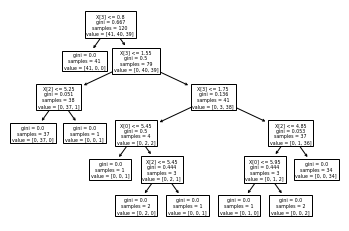

In [27]:
from sklearn import tree

tree.plot_tree(dt_clf)

## 예측 정확도는 0.9333이 나왔다.
--------------------------

## 번외로 트레이닝 , 테스트 셋 비율을 바꿔서 다시 실행해보자.

In [11]:
# 테스트 사이즈 0.1 높여서 0.3으로 실행

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.3, random_state = 12)

# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=12)

# 학습을 수행하자 !
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=12)

In [12]:
pred = dt_clf.predict(X_test)

from sklearn.metrics import accuracy_score 

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9556


In [13]:
# 테스트 사이즈 0.1 낮춰서 0.1으로 실행


X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.1, random_state = 13)

# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=13)

# 학습을 수행하자 !
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=13)

In [14]:
pred = dt_clf.predict(X_test)

from sklearn.metrics import accuracy_score 

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.8667


In [39]:
pred
# len(pred)

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [38]:
X_test
# len(X_test)

array([[6.8, 3. , 5.5, 2.1],
       [6.7, 3. , 5.2, 2.3],
       [6.3, 2.8, 5.1, 1.5],
       [6.3, 3.3, 4.7, 1.6],
       [6.4, 2.7, 5.3, 1.9],
       [4.9, 3.1, 1.5, 0.1],
       [6.7, 3.1, 4.4, 1.4],
       [5.7, 4.4, 1.5, 0.4],
       [4.8, 3.1, 1.6, 0.2],
       [6.1, 2.9, 4.7, 1.4],
       [6. , 2.2, 5. , 1.5],
       [6. , 2.2, 4. , 1. ],
       [5.4, 3. , 4.5, 1.5],
       [5.7, 2.5, 5. , 2. ],
       [6.9, 3.1, 5.4, 2.1],
       [4.5, 2.3, 1.3, 0.3],
       [6.3, 2.9, 5.6, 1.8],
       [5.6, 3. , 4.5, 1.5],
       [6.5, 3.2, 5.1, 2. ],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.5, 3.9, 1.1],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [6.4, 3.2, 4.5, 1.5],
       [4.8, 3. , 1.4, 0.1],
       [4.8, 3.4, 1.6, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [5.4, 3.9, 1.3, 0.4],
       [6. , 3.4, 4.5, 1.6]])

In [41]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [34]:
# myDf=pd.concat([X_test, pred], axis=1, sort=False)
# myDf

In [ ]:
# iris target값 네임: ['setosa' 'versicolor' 'virginica']

In [ ]:
tree.plot_tree(clf)

# 결론 : 테스트 사이즈 0.3 이 가장 정확도가 높다 ! 